# 1 - Importando e configurando pacotes utilizados

- [numpy](http://www.numpy.org) pacote básico para computação científica em Python.
- [matplotlib](http://matplotlib.org) pacote para exibição de gráficos e imagens em Python.
- np.random.seed(1) é utilizado para manter a consistência nas chamadas a funções randômicas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 12.0) # tamanho padrão das imagens
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
def show_img(img1, img2, img3=None, title1='', title2='', title3='', show_px_value=True):
    """
    Função auxiliar para a visualização das imagens geradas (grupos de 3 imagens).
    """
    
    fig, axarr = plt.subplots(1, (1 if img2 is None else (2 if img3 is None else 3)))
    
    norm_img1 = img1 if img1.shape == (1,1) else (img1-np.min(img1))/(np.max(img1)-np.min(img1))
    if (img2 is not None):
        axarr[0].set_title(title1)
        axarr[0].imshow(norm_img1)
    else:
        axarr.set_title(title1)
        axarr.imshow(norm_img1)
    if (show_px_value == True and img2 is not None):
        for w in range(img1.shape[0]):
            for h in range(img1.shape[1]):
                axarr[0].annotate("{:.1f}".format(img1[w][h]), xy=(h, w),
                            horizontalalignment='center',
                            verticalalignment='center',
                            color='white' if norm_img1[w][h] <= 0.25 or img1.shape == (1,1) else 'black')
    
    
    if (img2 is not None):
        norm_img2 = img2 if img2.shape == (1,1) else (img2-np.min(img2))/(np.max(img2)-np.min(img2))
        axarr[1].set_title(title2)
        axarr[1].imshow(norm_img2, cmap='gray')
        if (show_px_value == True):
            for w in range(img2.shape[0]):
                for h in range(img2.shape[1]):
                    axarr[1].annotate("{:.1f}".format(img2[w][h]), xy=(h, w),
                                horizontalalignment='center',
                                verticalalignment='center',
                                color='white' if norm_img2[w][h] <= 0.25 or img2.shape == (1,1) else 'black')

    if (img3 is not None):
        norm_img3 = img3 if img3.shape == (1,1) else (img3-np.min(img3))/(np.max(img3)-np.min(img3))
        axarr[2].set_title(title3)
        axarr[2].imshow(norm_img3, cmap='gray')
        if (show_px_value == True):
            for w in range(img3.shape[0]):
                for h in range(img3.shape[1]):
                    axarr[2].annotate("{:.1f}".format(img3[w][h]), xy=(h, w),
                                horizontalalignment='center',
                                verticalalignment='center',
                                color='white' if (norm_img3[w][h] <= 0.25 or img3.shape == (1,1)) else 'black')

# 2 - Função de padding


<img src="images/padding.png" style="width:600px;height:400px;">
    
[Função np.pad](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html)

In [6]:
def zero_pad(X, pad):
    """
    Completa com zeros todas as imagens da matriz X.
    
    Arguments:
    X -- array numpy de shape (m, n_C, n_H, n_W) representando um lote de 'm' imagens de 'n_C' canais e tamanho 'n_H' x 'n_W'
    pad -- numero inteiro representando o tamanho do padding que sera realizado em toddas as imagens de 'X'
    
    Returns:
    X_pad -- imagem completada com pad de shape (m, n_C, n_H + 2*pad, n_W + 2*pad)
    """
    
    X_pad = np.pad(X, ((0,0), (0,0), (pad,pad), (pad,pad)), 'constant', constant_values = (0,0))
    
    return X_pad

x.shape = (1, 3, 5, 5)
x_pad.shape = (1, 3, 7, 7)


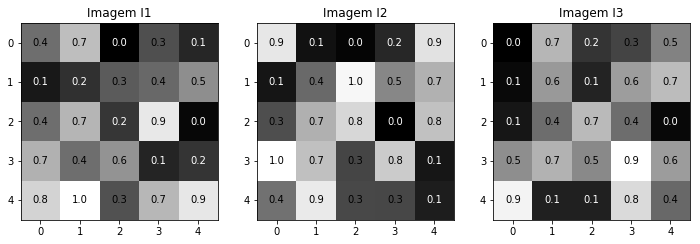

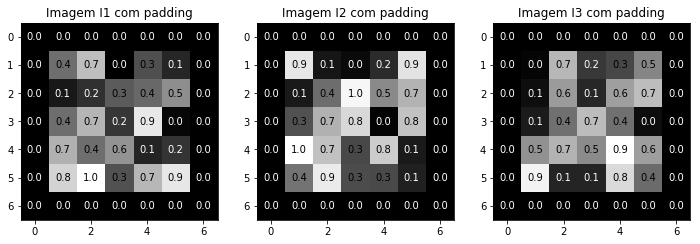

In [7]:
# Gera 1 imagem de 3 canais (RGB) de tamanho 5x5 aleatoriamente 
np.random.seed(1)
x = np.random.rand(1, 3, 5, 5)
print ("x.shape =", x.shape)

# Adiciona o padding de 1 nas imagens geradas aleatoriamente
x_pad = zero_pad(x, 1)
print ("x_pad.shape =", x_pad.shape)

# Exibe as imagens com e sem a aplicacao do padding
show_img(x[0][0], x[0][1], x[0][2], 'Imagem I1', 'Imagem I2', 'Imagem I3')
show_img(x_pad[0][0], x_pad[0][1], x_pad[0][2], 'Imagem I1 com padding', 'Imagem I2 com padding', 'Imagem I3 com padding')
            

# 3 - Função de Convolução

<img src="images/convolution.gif">

[Função np.multiply](https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html)

[Função np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html)

In [9]:
def conv_single_step(slice_window_prev, W, b):
    """
    Aplica a convolucao do filtro 'W' em uma unica janela 'slice_window_prev' da imagem.
    
    Arguments:
    slice_window_prev -- janela da imagem de shape (n_C, f, f) onde 'n_C' representa a quantidade de canais de uma imagem de tamanho 'f'x'f'
    W -- Filtro (Weight parameters) de convolução de shape igual a janela da imagem (n_C, f, f)
    b -- Bias a ser adicionado no resultado da convolucao - matriz de shape (1, 1, 1)
    
    Returns:
    Z -- um valor escalar, resultado da convolucao do filtro (W, b) na janela da imagem de entrada
    """

    # Multiplica os elementos de 'slice_window_prev' com 'W' (não adiciona o Bias ainda).
    s = np.multiply(slice_window_prev, W)
    # Soma todos os elementos de 's'.
    Z = np.sum(s)
    # Adiciona o Bias a Z (realiza o cast de 'b' para float() para forçar 'Z' retornar um valor escalar).
    Z = Z + b.astype(float)

    return Z

Bias: [[[-2.13483482]]]
Conv. result: [[ 1.79096919]] + [[ 3.82477831]] + [[ 1.00330289]] + [[[-2.13483482]]]
Conv. result: [[[ 4.48421557]]]


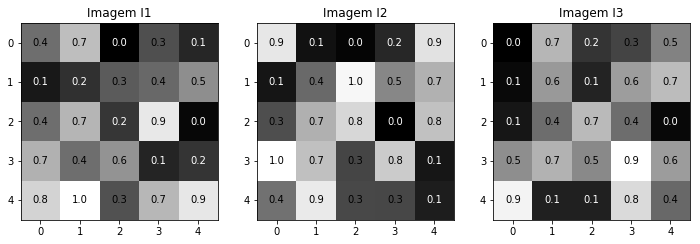

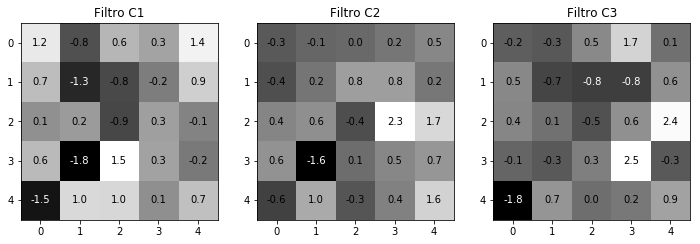

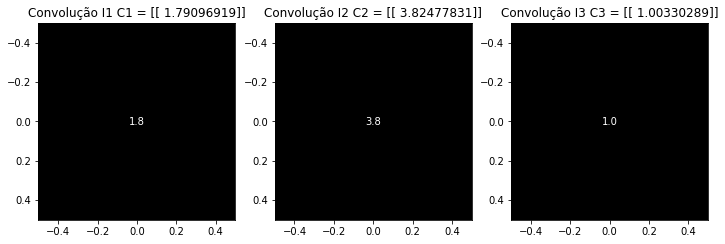

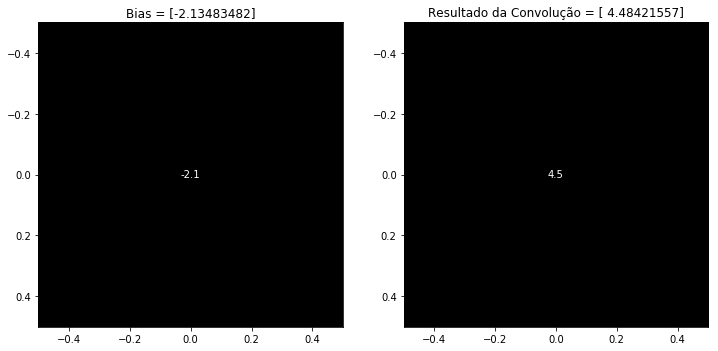

In [10]:
# Gera 1 imagem de 3 canais (RGB) de tamanho 5x5 aleatoriamente
np.random.seed(1)
slice_window_prev = np.random.rand(3, 5, 5)

# Gera 3 filtros de convolucao de tamanho 5x5 aleatoriamente 
W = np.random.randn(3, 5, 5)

# Gera o Bias aletoriamente (será acrescentado na convolução -> Z = W + b )
b = np.random.randn(1, 1, 1)

# Realiza a convolucao de cada canal separadamente para plotar as imagens
conv_c1 = conv_single_step(slice_window_prev[0], W[0], np.zeros((1,1)))
conv_c2 = conv_single_step(slice_window_prev[1], W[1], np.zeros((1,1)))
conv_c3 = conv_single_step(slice_window_prev[2], W[2], np.zeros((1,1)))

# Exibe o resultado das convoluções
show_img(slice_window_prev[0], slice_window_prev[1], slice_window_prev[2], 'Imagem I1', 'Imagem I2', 'Imagem I3')
show_img(W[0], W[1], W[2], 'Filtro C1', 'Filtro C2', 'Filtro C3')
show_img(conv_c1, conv_c2, conv_c3, f'Convolução I1 C1 = {conv_c1}', f'Convolução I2 C2 = {conv_c2}', f'Convolução I3 C3 = {conv_c3}')

# Calcula a convolução completa
Z = conv_single_step(slice_window_prev, W, b)
show_img(b[0], Z[0], None, f'Bias = {b[0][0]}', f'Resultado da Convolução = {Z[0][0]}')

print(f'Bias: {b}')
print(f'Conv. result: {conv_c1} + {conv_c2} + {conv_c3} + {b}')
print(f'Conv. result: {Z}')

In [11]:
def conv_forward(X, W, b, hparameters):
    """
    Implementa a função de convolução
    
    Arguments:
    X -- imagem a ser aplicada a convolução (imagem de saida da camada anterior), numpy array de shape (m, n_C, n_H, n_W) representando um lote de 'm' imagens de 'n_C' canais e tamanho 'n_H' x 'n_W'
    W -- Filtros (Weight parameters) de convolução de shape (n_C, n_C_prev, f, f) onde 'n_C_prev' representa a quantidade de canais de entrada, 'f'x'f' o tamanho do filtro e 'n_C' a quantidade de canais de saida
    b -- Biases, numpy array de shape (n_C, 1, 1, 1)
    hparameters -- objeto (python dictionary) contendo os valores de "stride" and "padding"
        
    Returns:
    Z -- saida da convolução, numpy array de shape (m, n_C, n_H, n_W)
    cache -- cache com os valores de entrada a ser utilizado no backpropagation (conv_backward())
    """
    
    # Recupera as informações de shape das imagens de entrada
    (m, n_C_prev, n_H_prev, n_W_prev) = X.shape
    
    # Recupera as informações de shape dos filtros de convolução
    (n_C, n_C_prev, f, f) = W.shape
    
    # Recupera as informações de stride e padding 
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Calcula as dimensões 'n_H' e 'n_W' de saida da convolução
    n_H = int((n_H_prev + 2*pad - f)/stride) + 1
    n_W = int((n_W_prev + 2*pad - f)/stride) + 1
    
    # Inicializa o volume de saida 'Z' com zeros
    Z = np.zeros([m, n_C, n_H, n_W])
    
    # Realiza o padding nas imagens, caso necessário
    X_pad = zero_pad(X, pad)
    
    for i in range(m):                      # itera sobre o lote de exemplos de treinamento
        x_pad = X_pad[i,:,:,:]              # seleciona o ith exemplo de treinamento
        for c in range(n_C):                # itera sobre os canais do volume de saida
            for h in range(n_H):            # itera sobre o eixo vertical do volume de saida
                for w in range(n_W):        # itera sobre o eixo horizontal do volume de saida
                    
                    # encontra os cantos da janela do filtro
                    vert_start = h*stride
                    vert_end = h*stride + f
                    horiz_start = w*stride 
                    horiz_end = w*stride + f
                    
                    # Encontra a janela para a aplicação do filtro de convolução
                    a_slice = x_pad[:,vert_start:vert_end,horiz_start:horiz_end]
                    
                    # Aplica o filtro de convolução
                    Z[i, c, h, w] = conv_single_step(a_slice, W[c, :, :, :], b[c,:,:,:])
    
    # Verificando se o shape da saida está correto
    assert(Z.shape == (m, n_C, n_H, n_W))
    
    # Guarda a passagem em cache para ser utilizado no backpropagation
    cache = (X, W, b, hparameters)
    
    return Z, cache

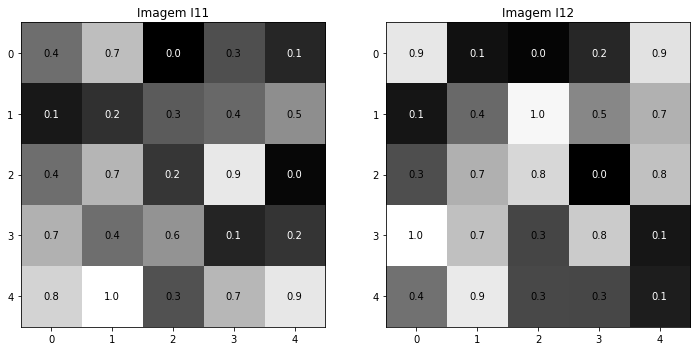

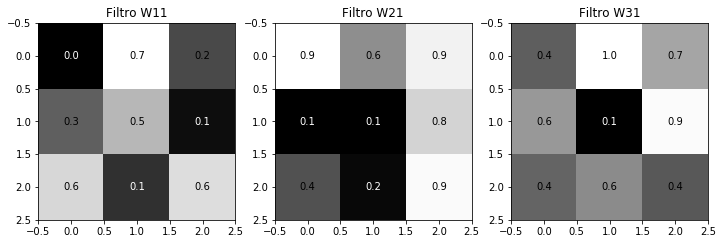

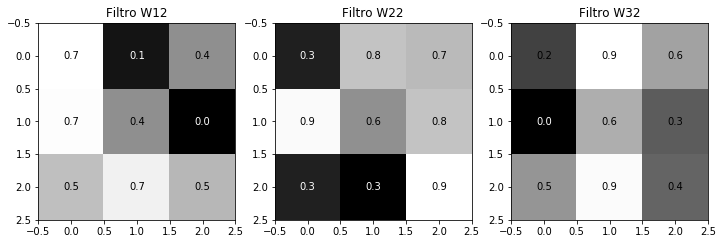

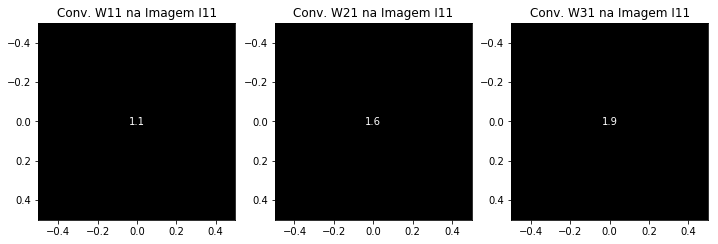

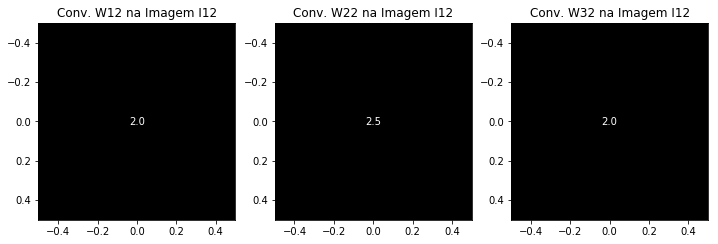

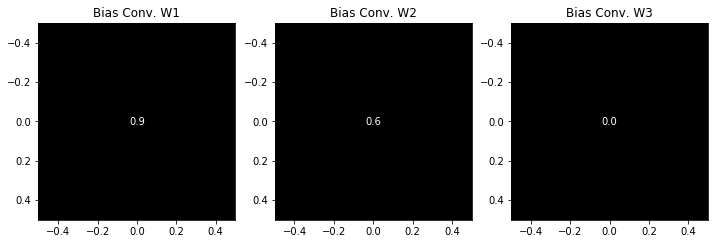

In [12]:
np.random.seed(1)
X = np.random.rand(1,2,5,5)
W = np.random.rand(3,2,3,3)
b = np.random.rand(3,1,1,1)
hparameters = {"pad" : 0, "stride": 1}

# Exibe as 2 imagens geradas aleatoriamente (1 imagem de 2 canais)
show_img(X[0][0], X[0][1], None, 'Imagem I11', 'Imagem I12', '')

# Exibe os 3 filtros de 2 dimensoes gerados aleatorimente
show_img(W[0][0], W[1][0], W[2][0], 'Filtro W11', 'Filtro W21', 'Filtro W31')
show_img(W[0][1], W[1][1], W[2][1], 'Filtro W12', 'Filtro W22', 'Filtro W32')

# Exibe o resultado da aplicação de uma única janela de convolução dos filtros W11 e W12 nas imagens I11 e I12
# Primeiro pixel (canto superior esquerdo)
conv_w1_i1 = conv_single_step(X[0][0][0:3, 0:3], W[0][0], np.zeros((1,1)))
conv_w4_i1 = conv_single_step(X[0][1][0:3, 0:3], W[0][1], np.zeros((1,1)))

# Exibe o resultado da aplicação de uma única janela de convolução dos filtros W21 e W22 nas imagens I11 e I12
# Primeiro pixel (canto superior esquerdo)
conv_w2_i1 = conv_single_step(X[0][0][0:3, 0:3], W[1][0], np.zeros((1,1)))
conv_w5_i1 = conv_single_step(X[0][1][0:3, 0:3], W[1][1], np.zeros((1,1)))

# Exibe o resultado da aplicação de uma única janela de convolução dos filtros W31 e W32 nas imagens I11 e I12
# Primeiro pixel (canto superior esquerdo)
conv_w3_i1 = conv_single_step(X[0][0][0:3, 0:3], W[2][0], np.zeros((1,1)))
conv_w6_i1 = conv_single_step(X[0][1][0:3, 0:3], W[2][1], np.zeros((1,1)))


show_img(conv_w1_i1, conv_w2_i1, conv_w3_i1, 'Conv. W11 na Imagem I11', 'Conv. W21 na Imagem I11', 'Conv. W31 na Imagem I11')
show_img(conv_w4_i1, conv_w5_i1, conv_w6_i1, 'Conv. W12 na Imagem I12', 'Conv. W22 na Imagem I12', 'Conv. W32 na Imagem I12')
show_img(b[0][0], b[1][0], b[2][0], 'Bias Conv. W1', 'Bias Conv. W2', 'Bias Conv. W3')


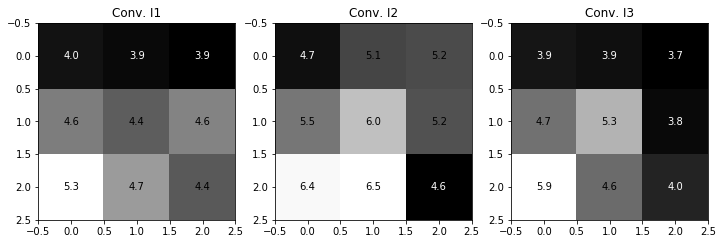

In [13]:
# Executando a convolução completa na imagem por meio do método criado
Z, cache_conv = conv_forward(X, W, b, hparameters)

show_img(Z[0][0], Z[0][1], Z[0][2], 'Conv. I1', 'Conv. I2', 'Conv. I3')

# 4 - Função de Ativação

<img src="images/relu.jpeg" style="width:500px;height:200px;">

In [14]:
def relu(Z, derivative=False):
    """
    Implementação da função de ativação ReLU
    
    Arguments:
    Z -- imagem a ser aplicada a função de ativação ReLU
    
    Returns:
    A -- saida da função de ativação ReLU
    """
    if (derivative == True):
        return np.where(Z <= 0, 0, 1)
        
    return np.maximum(Z, 0, Z)

In [15]:
def softmax(Z, derivative=False):
    """
    Implementação da função de ativação softmax
    
    Arguments:
    Z -- imagem a ser aplicada a função de ativação softmax
    
    Returns:
    A -- saida da função de ativação
    """
    e_Z = np.exp(Z)
    return e_Z / np.sum(e_Z)

# 5 - Função de Pooling

<img src="images/maxpooling.gif" style="width:500px;height:200px;">

In [16]:
def pool_forward(X, hparameters, mode = "max"):
    """
    Implementa a função de pooling
    
    Arguments:
    X -- imagem a ser aplicada o pooling (imagem de saida da camada anterior), numpy array de shape (m, n_C, n_H, n_W) representando um lote de 'm' imagens de 'n_C' canais e tamanho 'n_H' x 'n_W'
    hparameters -- objeto (python dictionary) contendo os valores de "stride" e o tamanho da máscara 'f'
    mode -- tipo da função de pooling ('max' ou 'average')
        
    Returns:
    A -- imagem de saída da função de pooling, numpy array de shape (m, n_C, n_H, n_W)
    cache -- cache com os valores de entrada a ser utilizado no backpropagation (pool_backward())
    """
    
    # Recupera as dimensões da imagem
    (m, n_C_prev, n_H_prev, n_W_prev) = X.shape
    
    # Recupera os parametros 'stride' e tamanho da máscara 'f'x'f'
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define as dimensões da imagem de saida
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Inicializa a matriz de saída 'A'
    A = np.zeros((m, n_C, n_H, n_W))
    
    for i in range(m):                 # itera sobre os exemplos de treinamento
        for c in range (n_C):          # itera sobre os canais do volume de saída
            for h in range(n_H):       # itera sobre o eixo vertical do volume de saída
                for w in range(n_W):   # itera sobre o eixo horizontal do voume de saída
                    
                    # encontra os cantos da janela da mácara de pooling
                    vert_start = h*stride
                    vert_end = h*stride +f
                    horiz_start = w*stride
                    horiz_end = w*stride + f
                    
                    # Encontra a janela para a aplicação da função de pooling
                    x_slice = X[i, c, vert_start:vert_end, horiz_start:horiz_end]
                    
                    # Aplica a operação de pooling
                    if mode == "max":
                        A[i, c, h, w] = np.max(x_slice)
                    elif mode == "average":
                        A[i, c, h, w] = np.mean(x_slice)
    
    # Guarda a passagem em cache para ser utilizado no backpropagation
    cache = (X, hparameters)
    
    # Verificando se o shape da saida está correto
    assert(A.shape == (m, n_C, n_H, n_W))
    
    return A, cache

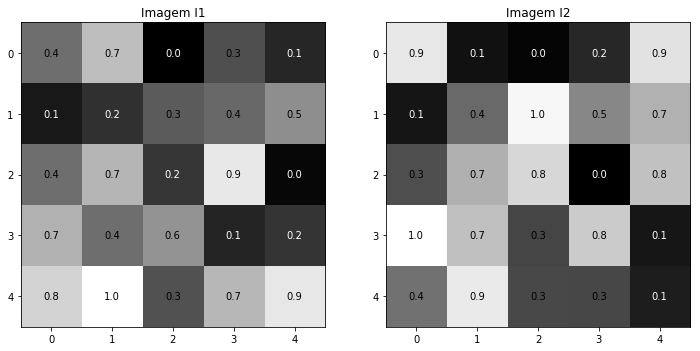

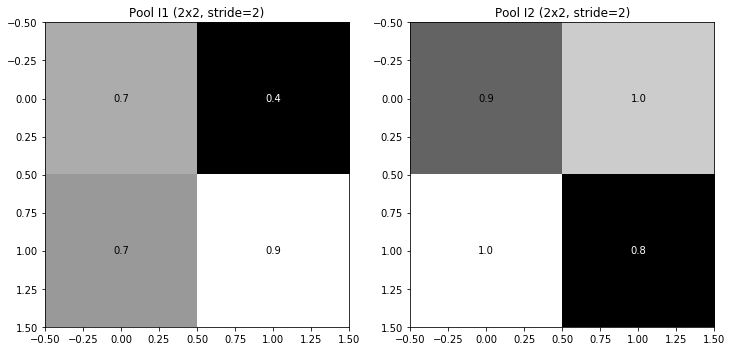

In [17]:
np.random.seed(1)
X = np.random.rand(1,2,5,5)
hparameters = {"stride" : 2, "f": 2}

A, cache_pool = pool_forward(X, hparameters)

# Exibe as 2 imagens geradas aleatoriamente
show_img(X[0][0], X[0][1], None, 'Imagem I1', 'Imagem I2', '')
# Exibe a saída da camada de pooling
show_img(A[0][0], A[0][1], None, 'Pool I1 (2x2, stride=2)', 'Pool I2 (2x2, stride=2)', '')

# 6 - Flattening (extraindo o vetor de características)

In [19]:
def flatten(X):
    """
    Transforma a matriz n-dimensional 'x' em um vetor de características.
    """
    #return X.flatten()
    #return X.reshape((X.shape[0], 1))
    #return X.reshape(X.shape[0], -1).T
    return X.reshape(X.shape[0], -1)

A.shape: (1, 3, 2, 2)
Vetor de características extraído: (1, 12)
[[ 5.3780186   5.81755239  6.59059143  6.48067266  4.16269701  4.49481852
   4.83600758  5.70835347  4.06989442  4.08254349  4.8753804   5.3168844 ]]


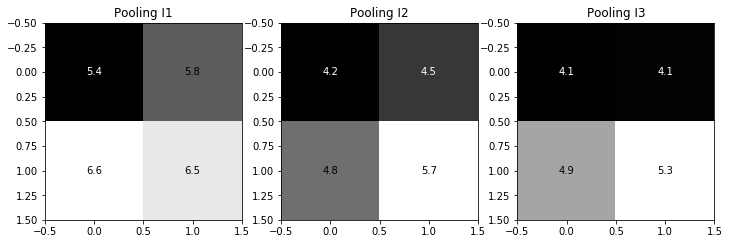

In [20]:
np.random.seed(1)
X = np.random.rand(1,2,7,7)
W = np.random.rand(3,2,3,3)
b = np.random.rand(3,1,1,1)
hparameters = {"pad" : 0, "stride": 1}

Z, cache_conv = conv_forward(X, W, b, hparameters)
A = relu(Z)

hparameters = {"stride" : 2, "f": 2}
A, cache_pool = pool_forward(A, hparameters)

# Exibe a saída da camada de pooling
show_img(A[0][0], A[0][1], A[0][2], 'Pooling I1', 'Pooling I2', 'Pooling I3')

FEAT = flatten(A)
print(f'A.shape: {A.shape}')
print(f'Vetor de características extraído: {FEAT.shape}')
print(FEAT)